In [1]:
# Load specific forecasting and evaluation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy


                     RMS_Value
time                          
2019-11-28 07:00:00   0.984083
2019-11-28 07:01:00   1.246701
2019-11-28 07:02:00   1.004492
2019-11-28 07:03:00   0.979750
2019-11-28 07:04:00   0.886278
2019-11-28 07:05:00   0.905190
2019-11-28 07:06:00   0.959868
2019-11-28 07:07:00   0.948778
2019-11-28 07:08:00   0.988192
2019-11-28 07:09:00   0.951107
2019-11-28 07:10:00   0.927097
2019-11-28 07:11:00   0.923010
2019-11-28 07:12:00   0.962012
2019-11-28 07:13:00   0.948916
2019-11-28 07:14:00   0.865217
2019-11-28 07:15:00   0.963713
2019-11-28 07:16:00   0.915931
2019-11-28 07:17:00   0.922979
2019-11-28 07:18:00   0.935591
2019-11-28 07:19:00   0.933210


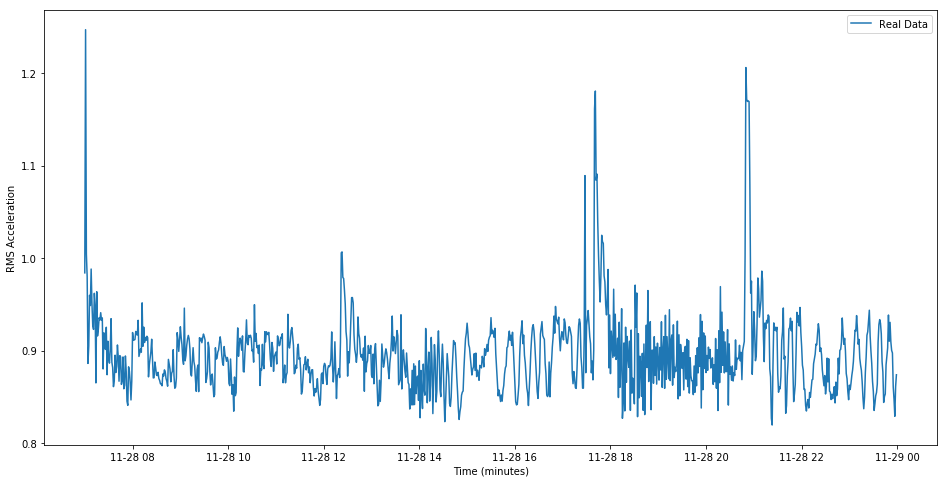

In [70]:
# Multiple out of sample forecast
# Load the data 
df = pd.read_excel('TestData1DFull_1m.xls', header=0, index_col=0, parse_dates= True)
# display first few rows
print(df.head(20))
# line plot of dataset
plt.figure(figsize=(16,8))
plt.plot(df['RMS_Value'], label = 'Real Data')
plt.ylabel('RMS Acceleration')
plt.xlabel('Time (minutes)')
plt.legend(loc='best')
plt.show()

In [4]:
#split the dataset
split_point = len(df) - 60
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', index=False) 
validation.to_excel('validation.xlsx', index=False)

Dataset 960, Validation 60


In [7]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)


In [8]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


In [9]:
# Load the data
X = dataset.values
minutes_in_hour = 60
differenced = difference(X, minutes_in_hour)


In [54]:
# fit model
model = ARIMA(differenced, order=(2,0,2))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  900
Model:                     ARMA(2, 2)   Log Likelihood                1551.924
Method:                       css-mle   S.D. of innovations              0.043
Date:                Mon, 24 Feb 2020   AIC                          -3091.849
Time:                        18:40:54   BIC                          -3063.034
Sample:                             0   HQIC                         -3080.841
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.005     -0.544      0.587      -0.013       0.007
ar.L1.y        0.3804      0.143      2.658      0.008       0.100       0.661
ar.L2.y        0.2590      0.119      2.180      0.0

In [50]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=60)[0]


In [51]:
# invert the differenced forecast to something usable
history = [x for x in X]
minute = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, minutes_in_hour)
	print('Minute %d: %f' % (minute, inverted))
	history.append(inverted)
	minute += 1


Minute 1: 0.843685
Minute 2: 0.839614
Minute 3: 0.845249
Minute 4: 0.832586
Minute 5: 0.838946
Minute 6: 0.825908
Minute 7: 0.823053
Minute 8: 0.834241
Minute 9: 0.839604
Minute 10: 0.831695
Minute 11: 0.849419
Minute 12: 0.844972
Minute 13: 0.855142
Minute 14: 0.864647
Minute 15: 0.865406
Minute 16: 0.882569
Minute 17: 0.888133
Minute 18: 0.893081
Minute 19: 0.904073
Minute 20: 0.903310
Minute 21: 0.915727
Minute 22: 0.926122
Minute 23: 0.919178
Minute 24: 0.896307
Minute 25: 0.900192
Minute 26: 0.892857
Minute 27: 0.876235
Minute 28: 0.867615
Minute 29: 0.859278
Minute 30: 0.870282
Minute 31: 0.850423
Minute 32: 0.858429
Minute 33: 0.889126
Minute 34: 0.863429
Minute 35: 0.888390
Minute 36: 0.853462
Minute 37: 0.852373
Minute 38: 0.844400
Minute 39: 0.850055
Minute 40: 0.845303
Minute 41: 0.851047
Minute 42: 0.858251
Minute 43: 0.840730
Minute 44: 0.863192
Minute 45: 0.848564
Minute 46: 0.855673
Minute 47: 0.889092
Minute 48: 0.872065
Minute 49: 0.897629
Minute 50: 0.898489
Minute 51

In [52]:
dfResults = pd.DataFrame(history)
print (dfResults)



             0
0     0.984083
1     1.246701
2     1.004492
3     0.979750
4     0.886278
5     0.905190
6     0.959868
7     0.948778
8     0.988192
9     0.951107
10    0.927097
11    0.923010
12    0.962012
13    0.948916
14    0.865217
15    0.963713
16    0.915931
17    0.922979
18    0.935591
19    0.933210
20    0.941054
21    0.932782
22    0.935456
23    0.880312
24    0.919264
25    0.904525
26    0.901409
27    0.925333
28    0.874059
29    0.910226
...        ...
990   0.850423
991   0.858429
992   0.889126
993   0.863429
994   0.888390
995   0.853462
996   0.852373
997   0.844400
998   0.850055
999   0.845303
1000  0.851047
1001  0.858251
1002  0.840730
1003  0.863192
1004  0.848564
1005  0.855673
1006  0.889092
1007  0.872065
1008  0.897629
1009  0.898489
1010  0.906208
1011  0.932475
1012  0.915723
1013  0.904071
1014  0.910488
1015  0.896871
1016  0.872550
1017  0.866970
1018  0.853060
1019  0.844202

[1020 rows x 1 columns]


In [53]:
split_point = len(dfResults) - 60
dataset2, forecast = dfResults[0:split_point], dfResults[split_point:]
print('Dataset2 %d, Forecast %d' % (len(dataset2), len(forecast)))
dataset2.to_excel('dataset2.xlsx', index=False) 
forecast.to_excel('forecast.xlsx', index=False)



Dataset2 960, Forecast 60


In [59]:
# reset index of the forecast to 0 
forecast.reset_index(drop=True, inplace=True)
forecast.head()


,0
0,0.843685
1,0.839614
2,0.845249
3,0.832586
4,0.838946


In [62]:
# reset index of the validate to 0 
validation.reset_index(drop=True, inplace=True)
validation.head()

,RMS_Value
0,0.862791
1,0.858081
2,0.865041
3,0.873206
4,0.879244


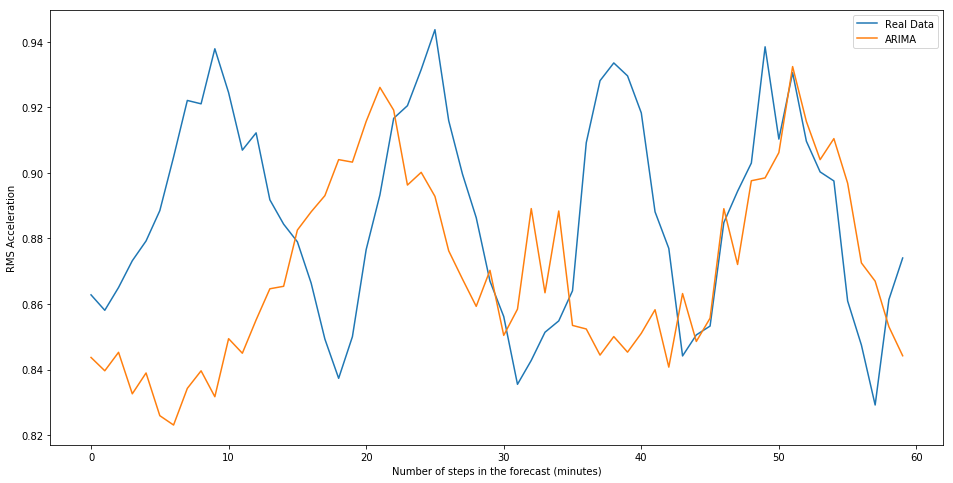

In [69]:
plt.figure(figsize=(16,8))
plt.plot(validation['RMS_Value'], label = 'Real Data')
plt.plot(forecast, label = 'ARIMA' )
plt.ylabel('RMS Acceleration')
plt.xlabel('Number of steps in the forecast (minutes)')
plt.legend(loc='best')
plt.show()


In [64]:
rms = sqrt(mean_squared_error(forecast, validation))
print(rms)


0.04407143923191845
